## Practical use of MLP

today we'll use MLP for famous datasets of real data. Need pay attention to finding proper structure of the network and hyperparameters of its training, use weight maps as a helpful tool for this.

### Classification

In [10]:
import pandas as pd

In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve,  auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing
import itertools
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
sns.set_style("dark")

In [37]:
# define helper functions (same as on previous classes)
def show_class_plot(X, Y, pred_func):
    """
    Helping function for visualisation of decision boundary of classifier
    """
    h = 0.1
    
    # transform data in case of many dimensions
    n_components = 2
    transform=False
    if X.shape[1] > n_components:
        transform=True
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)    
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    pt = np.c_[xx.ravel(), yy.ravel()]
    if transform:
        pt = pca.inverse_transform(pt)
    Z = np.around(pred_func(pt))  # round to have exact class

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.colorbar()

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='black')   

In [18]:
# define function for display of confusion matrix
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print('Confusion matrix, without normalization')
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()  

#### Iris
most famous classsification dataset is the "Iris" dataset, Scikit icludes it for us:

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris_data = load_iris()

In [7]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
Y = iris_data.target

In [9]:
X = iris_data.data

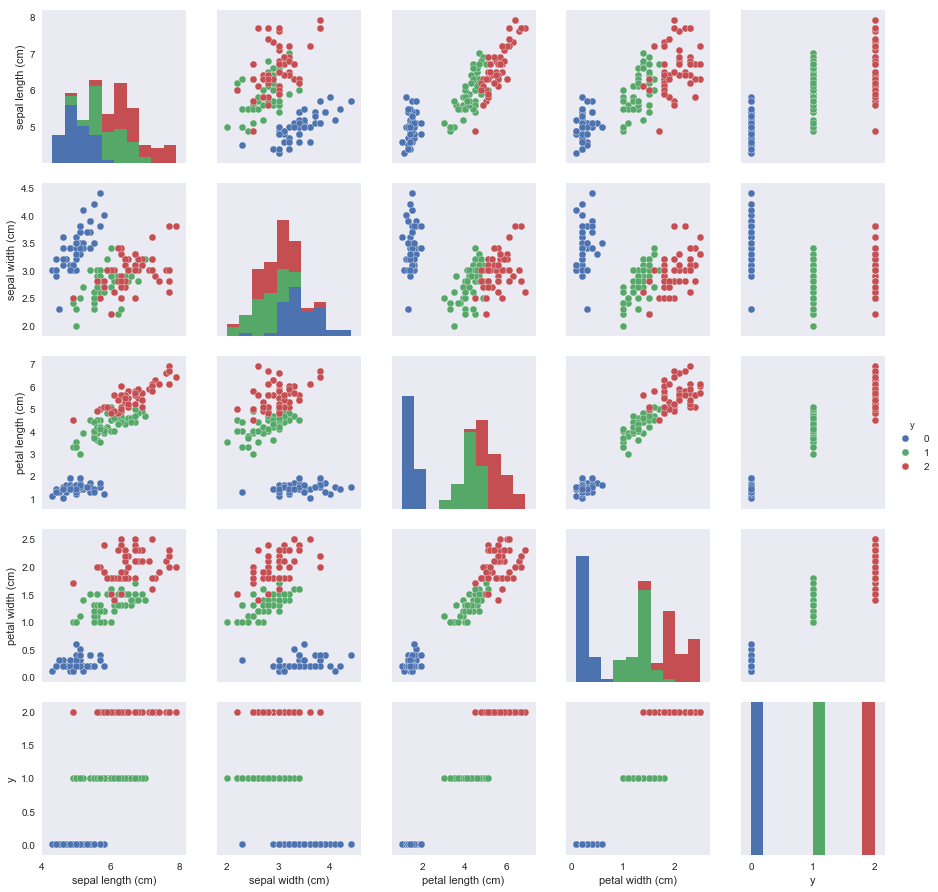

In [10]:
df = pd.DataFrame(X, columns=iris_data.feature_names, index=Y)
df['y'] = Y
sns.pairplot(df, hue='y');

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(2, ), activation='logistic', learning_rate_init=0.01, max_iter=2000, solver='adam')

In [13]:
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

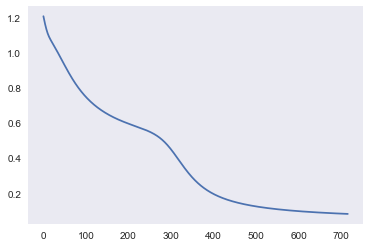

In [14]:
plt.plot(clf.loss_curve_)

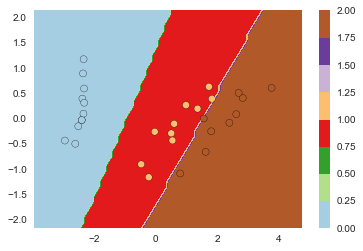

In [15]:
show_class_plot(x_test, y_test, clf.predict)

In [16]:
Y_pred = np.around(clf.predict(x_test))

Confusion matrix, without normalization
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


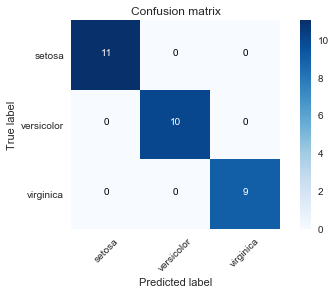

In [19]:
plot_confusion_matrix(y_test, Y_pred, classes=iris_data.target_names)

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. 

For example 
- if weights look unstructured, maybe some were not used at all, or 
- if very large coefficients exist, maybe regularization was too low or the learning rate too high.

In [20]:
# first layer weight matrix have the shape (n_features, hidden_layer_sizes[0])
clf.coefs_[0].T

array([[ 1.18,  2.01, -2.39, -4.07],
       [-0.09,  2.24, -2.27, -2.52]])

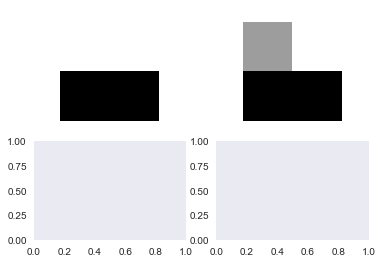

In [21]:
fig, axes = plt.subplots(2, 2)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(2,2), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.axis('off')
plt.show()

#### Optical Recognition of Handwritten Digits Data Set
The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

In [22]:
from sklearn.datasets import load_digits

In [23]:
digits_data = load_digits()

In [24]:
print(digits_data['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [25]:
Y = digits_data.target

In [26]:
X = digits_data.data

In [31]:
# look at data here!
X.shape

(1797, 64)

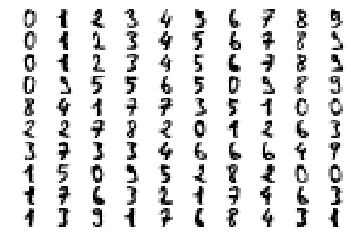

In [28]:
plt.figure(1,facecolor='white')
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(digits_data.images[i], cmap=plt.cm.Greys)
    plt.axis('off')

plt.show() # show the figure

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [93]:
#domyślnie było clf = MLPClassifier(hidden_layer_sizes=(3, ), activation='logistic', learning_rate_init=0.01, max_iter=2000, solver='adam')
clf = MLPClassifier(hidden_layer_sizes=(8, ), activation='logistic', learning_rate_init=0.01, max_iter=5000, solver='adam')

In [94]:
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
Krzywa prezentująca categorical crossing

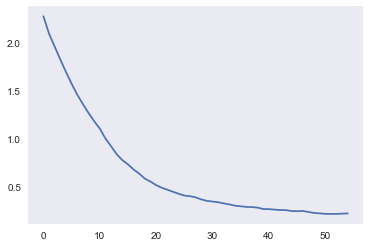

In [95]:
plt.plot(clf.loss_curve_)

Tutaj zmiejszamy ilość wymiarów, bo na wejściu mamy 64 wymiary (bo jedna cyferka jest reprezentowana przez wektor 64). Robimy tę transformację za pomocą PCA (w metodzie show_class_plot).

Teraz jest też nowa metoda tSNA - wektory słów w przestrzeni. Grupuje i umiejscawia wektory podobne koło siebie, a mniej podobne oddala.



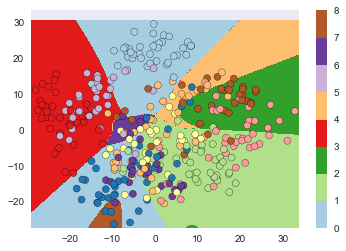

In [96]:
show_class_plot(x_test, y_test, clf.predict)

In [97]:
Y_pred = np.around(clf.predict(x_test))

Confusion matrix, without normalization
[[37  0  0  0  0  1  0  0  0  0]
 [ 0 38  0  0  1  0  0  1  1  0]
 [ 0  2 36  0  0  1  0  0  0  0]
 [ 1  0  2 30  0  3  0  0  2  0]
 [ 1  0  0  0 32  0  1  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  2]
 [ 0  1  2  0  0  0  0  0 30  0]
 [ 0  1  0  3  0  0  0  0  0 31]]


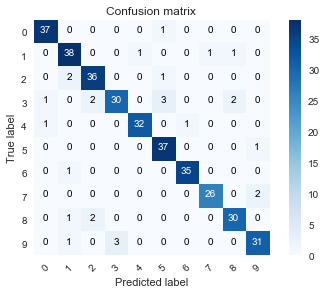

In [98]:
plot_confusion_matrix(y_test, Y_pred, classes=digits_data.target_names)

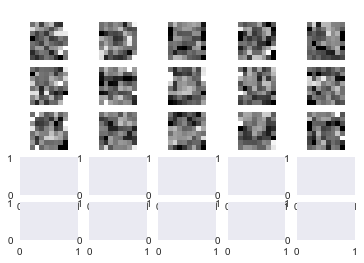

In [85]:
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.axis('off')
plt.show()

Z Tych obrazków widzimy, że się sieć się słabo nauczyła. Teraz nasze zadanie to zmienić paramwtry sieci i dobryć liczny ukrytych wartsw i neuronów, tak, żeby confusion matrix dobrze wyglądała.

### Regression

In [99]:
from sklearn.datasets import load_boston

In [100]:
boston_data = load_boston()

In [101]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [102]:
Y = boston_data.target

In [103]:
X = boston_data.data

In [104]:
# look at data here!

In [105]:
df = pd.DataFrame(X, columns=boston_data.feature_names, index=Y)
df['y'] = Y

In [227]:
df_norm = (df - df.mean()) / (df.max() - df.min())

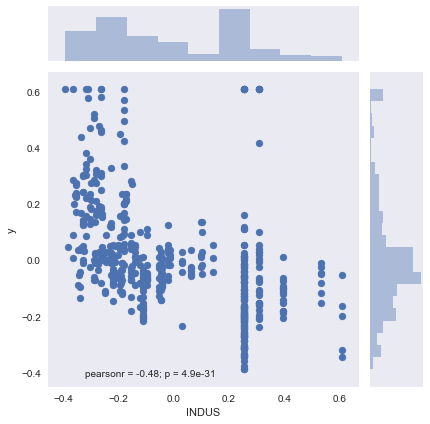

In [228]:
sns.jointplot(x="INDUS", y="y", data=df_norm);

In [279]:
preprocessing.scale(X)
X = preprocessing.scale(X)

In [280]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [304]:
reg = MLPRegressor(hidden_layer_sizes=(160, ), activation='logistic', learning_rate_init=0.01, max_iter=2000, solver='adam')

In [305]:
reg.fit(x_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(160,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

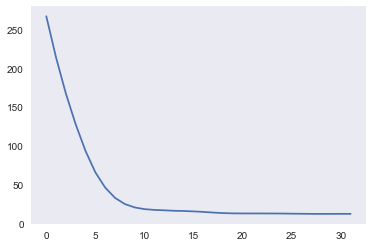

In [306]:
plt.plot(reg.loss_curve_)

In [307]:
reg.score(x_test, y_test)

0.73029865261976412

In [308]:
reg.predict(x_test)

array([ 25.06,  12.62,  21.24,  10.77,  23.55,  20.08,  33.56,  33.97,
        24.7 ,  24.27,  22.62,  13.15,  37.15,  20.86,  17.18,  24.97,
        20.01,  15.52,  26.05,  18.6 ,  25.38,  14.73,  35.74,   6.97,
        28.72,  26.46,  22.19,  24.59,  28.56,  23.61,  21.96,  17.25,
        19.59,  17.54,  23.39,  27.95,  21.73,  34.72,  13.58,  31.77,
        20.7 ,  25.59,  33.74,  12.66,  18.27,  18.43,  37.33,  23.53,
        19.62,  26.38,  29.4 ,  14.13,  20.39,  29.21,  29.26,  18.29,
        32.87,  18.96,  36.01,  23.28,  32.14,  29.15,   6.88,  19.96,
        16.21,  29.5 ,  24.72,  11.14,  21.43,  27.08,   4.4 ,  13.87,
        35.45,  33.18,  20.36,  17.63,  25.52,   6.89,  15.16,  18.3 ,
        11.  ,  18.21,  24.32,  25.53,  21.81,  20.02,  16.54,  37.7 ,
        12.23,  39.44,  14.01,  18.64,  15.96,  23.85,  34.37,  28.3 ,
        18.81,  20.2 ,  13.1 ,  19.34,  18.5 ,  11.71])

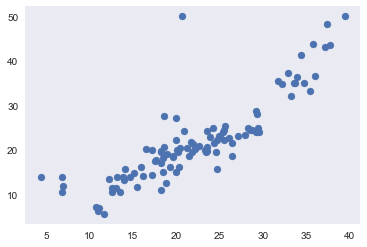

In [309]:
plt.scatter(reg.predict(x_test), y_test)

In [310]:
reg.coefs_

[array([[-0.25, -0.01, -0.01, ..., -0.12, -0.12, -0.29],
        [ 0.05,  0.16,  0.08, ...,  0.01,  0.07,  0.12],
        [-0.13,  0.16,  0.13, ..., -0.08, -0.02,  0.  ],
        ..., 
        [-0.18, -0.14, -0.15, ..., -0.25, -0.15, -0.26],
        [ 0.11, -0.15, -0.11, ...,  0.12,  0.24,  0.28],
        [-0.36, -0.22, -0.13, ..., -0.49, -0.39, -0.36]]), array([[ 0.35],
        [ 0.21],
        [ 0.18],
        [ 0.22],
        [ 0.36],
        [ 0.3 ],
        [ 0.35],
        [ 0.14],
        [ 0.24],
        [ 0.25],
        [ 0.27],
        [ 0.33],
        [ 0.29],
        [ 0.16],
        [ 0.27],
        [ 0.33],
        [ 0.31],
        [ 0.24],
        [ 0.25],
        [ 0.21],
        [ 0.29],
        [ 0.22],
        [ 0.31],
        [ 0.16],
        [ 0.35],
        [ 0.35],
        [ 0.2 ],
        [ 0.24],
        [ 0.28],
        [ 0.28],
        [ 0.27],
        [ 0.37],
        [ 0.27],
        [ 0.25],
        [ 0.3 ],
        [ 0.26],
        [ 0.14],
        [ 0.2 

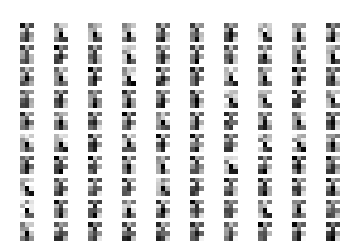

In [313]:
fig, axes = plt.subplots(10, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = reg.coefs_[0].min(), reg.coefs_[0].max()
for coef, ax in zip(reg.coefs_[0].T, axes.ravel()):
    ax.matshow(coef[:-1].reshape(4,-1), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.axis('off')
plt.show()

## Self-organizing maps (Kohonen networks)

<img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Synapse_Self-Organizing_Map.png" width="600px" />

In [318]:

"""
    Minimalistic implementation of the Self Organizing Maps (SOM).
    
    https://github.com/JustGlowing/minisom
"""
from math import sqrt

from numpy import (array, unravel_index, nditer, linalg, random, subtract,
                   power, exp, pi, zeros, arange, outer, meshgrid, dot)
from collections import defaultdict
from warnings import warn




def fast_norm(x):
    """Returns norm-2 of a 1-D numpy array.
    * faster than linalg.norm in case of 1-D arrays (numpy 1.9.2rc1).
    """
    return sqrt(dot(x, x.T))


class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=None, random_seed=None):
        """
            Initializes a Self Organizing Maps.
            x,y - dimensions of the SOM
            input_len - number of the elements of the vectors in input
            sigma - spread of the neighborhood function (Gaussian), needs to be adequate to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T) where T is #num_iteration/2)
            learning_rate - initial learning rate
            (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)
            decay_function, function that reduces learning_rate and sigma at each iteration
                            default function: lambda x,current_iteration,max_iter: x/(1+current_iteration/max_iter)
            random_seed, random seed to use.
        """
        if sigma >= x/2.0 or sigma >= y/2.0:
            warn('Warning: sigma is too high for the dimension of the map.')
        if random_seed:
            self.random_generator = random.RandomState(random_seed)
        else:
            self.random_generator = random.RandomState(random_seed)
        if decay_function:
            self._decay_function = decay_function
        else:
            self._decay_function = lambda x, t, max_iter: x/(1+t/max_iter)
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = self.random_generator.rand(x,y,input_len)*2-1 # random initialization
        for i in range(x):
            for j in range(y):
                self.weights[i,j] = self.weights[i,j] / fast_norm(self.weights[i,j]) # normalization
        self.activation_map = zeros((x,y))
        self.neigx = arange(x)
        self.neigy = arange(y) # used to evaluate the neighborhood function
        self.neighborhood = self.gaussian

    def _activate(self, x):
        """ Updates matrix activation_map, in this matrix the element i,j is the response of the neuron i,j to x """
        s = subtract(x, self.weights) # x - w
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.activation_map[it.multi_index] = fast_norm(s[it.multi_index])  # || x - w ||
            it.iternext()

    def activate(self, x):
        """ Returns the activation map to x """
        self._activate(x)
        return self.activation_map

    def gaussian(self, c, sigma):
        """ Returns a Gaussian centered in c """
        d = 2*pi*sigma*sigma
        ax = exp(-power(self.neigx-c[0], 2)/d)
        ay = exp(-power(self.neigy-c[1], 2)/d)
        return outer(ax, ay)  # the external product gives a matrix

    def diff_gaussian(self, c, sigma):
        """ Mexican hat centered in c (unused) """
        xx, yy = meshgrid(self.neigx, self.neigy)
        p = power(xx-c[0], 2) + power(yy-c[1], 2)
        d = 2*pi*sigma*sigma
        return exp(-p/d)*(1-2/d*p)

    def winner(self, x):
        """ Computes the coordinates of the winning neuron for the sample x """
        self._activate(x)
        return unravel_index(self.activation_map.argmin(), self.activation_map.shape)

    def update(self, x, win, t):
        """
            Updates the weights of the neurons.
            x - current pattern to learn
            win - position of the winning neuron for x (array or tuple).
            t - iteration index
        """
        eta = self._decay_function(self.learning_rate, t, self.T)
        sig = self._decay_function(self.sigma, t, self.T) # sigma and learning rate decrease with the same rule
        g = self.neighborhood(win, sig)*eta # improves the performances
        it = nditer(g, flags=['multi_index'])
        while not it.finished:
            # eta * neighborhood_function * (x-w)
            self.weights[it.multi_index] += g[it.multi_index]*(x-self.weights[it.multi_index])
            # normalization
            self.weights[it.multi_index] = self.weights[it.multi_index] / fast_norm(self.weights[it.multi_index])
            it.iternext()

    def quantization(self, data):
        """ Assigns a code book (weights vector of the winning neuron) to each sample in data. """
        q = zeros(data.shape)
        for i, x in enumerate(data):
            q[i] = self.weights[self.winner(x)]
        return q

    def random_weights_init(self, data):
        """ Initializes the weights of the SOM picking random samples from data """
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.weights[it.multi_index] = data[self.random_generator.randint(len(data))]
            self.weights[it.multi_index] = self.weights[it.multi_index]/fast_norm(self.weights[it.multi_index])
            it.iternext()

    def train_random(self, data, num_iteration):
        """ Trains the SOM picking samples at random from data """
        self._init_T(num_iteration)
        for iteration in range(num_iteration):
            rand_i = self.random_generator.randint(len(data)) # pick a random sample
            self.update(data[rand_i], self.winner(data[rand_i]), iteration)

    def train_batch(self, data, num_iteration):
        """ Trains using all the vectors in data sequentially """
        self._init_T(len(data)*num_iteration)
        iteration = 0
        while iteration < num_iteration:
            idx = iteration % (len(data)-1)
            self.update(data[idx], self.winner(data[idx]), iteration)
            iteration += 1

    def _init_T(self, num_iteration):
        """ Initializes the parameter T needed to adjust the learning rate """
        self.T = num_iteration/2  # keeps the learning rate nearly constant for the last half of the iterations

    def distance_map(self):
        """ Returns the distance map of the weights.
            Each cell is the normalised sum of the distances between a neuron and its neighbours.
        """
        um = zeros((self.weights.shape[0], self.weights.shape[1]))
        it = nditer(um, flags=['multi_index'])
        while not it.finished:
            for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
                for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
                    if ii >= 0 and ii < self.weights.shape[0] and jj >= 0 and jj < self.weights.shape[1]:
                        um[it.multi_index] += fast_norm(self.weights[ii, jj, :]-self.weights[it.multi_index])
            it.iternext()
        um = um/um.max()
        return um

    def activation_response(self, data):
        """
            Returns a matrix where the element i,j is the number of times
            that the neuron i,j have been winner.
        """
        a = zeros((self.weights.shape[0], self.weights.shape[1]))
        for x in data:
            a[self.winner(x)] += 1
        return a

    def quantization_error(self, data):
        """
            Returns the quantization error computed as the average distance between
            each input sample and its best matching unit.
        """
        error = 0
        for x in data:
            error += fast_norm(x-self.weights[self.winner(x)])
        return error/len(data)

    def win_map(self, data):
        """
            Returns a dictionary wm where wm[(i,j)] is a list with all the patterns
            that have been mapped in the position i,j.
        """
        winmap = defaultdict(list)
        for x in data:
            winmap[self.winner(x)].append(x)
        return winmap

In [319]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [340]:
som = MiniSom(20,20,64,sigma=.8,learning_rate=0.5)

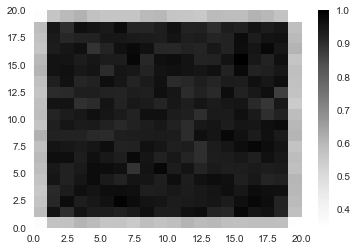

In [341]:
plt.pcolor(som.distance_map().T)
plt.colorbar()

In [342]:
print("Training...")
som.train_random(digits_data.data,1500) # random training
print("\n...ready!")

Training...

...ready!


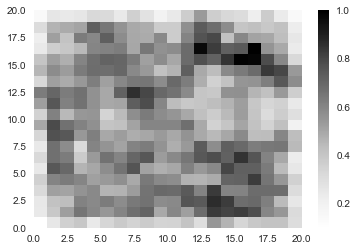

In [343]:
plt.pcolor(som.distance_map().T)
plt.colorbar()

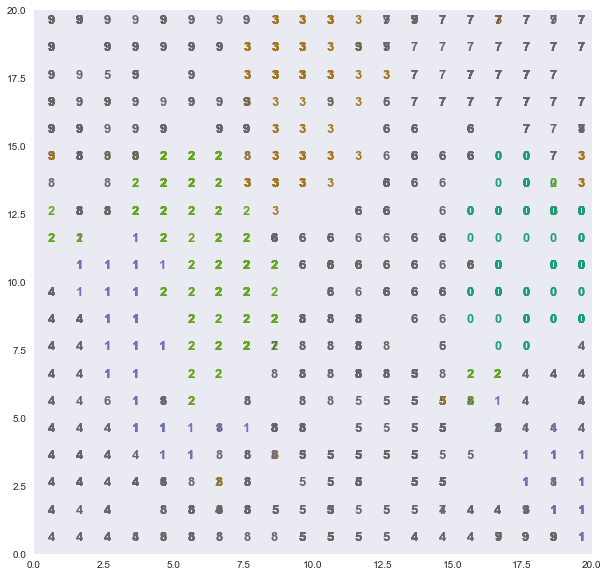

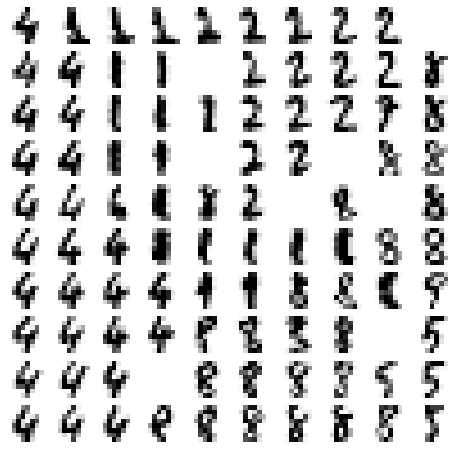

In [344]:
# plotting the results
wmap = {}
plt.figure(1,figsize=(10,10), facecolor='white')
im = 0
# scatterplot
for x,t in zip(digits_data.data,digits_data.target): 
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+.5, w[1]+.5, str(t), color=plt.cm.Dark2(t / 4.), fontdict={'weight': 'bold', 'size': 13})
    im = im + 1
plt.axis([0,som.weights.shape[0],0,som.weights.shape[1]])

plt.figure(2,facecolor='white', figsize=(8,8))
cnt = 0
for j in reversed(range(10)): # images mosaic
    for i in range(10):
        plt.subplot(10,10,cnt+1,frameon=False, xticks=[], yticks=[])
        if (i,j) in wmap:
            plt.imshow(digits_data.images[wmap[(i,j)]], cmap='Greys',  interpolation='nearest')
        else:
            plt.imshow(np.zeros((8,8)), cmap='Greys')
        cnt = cnt + 1

plt.show() # show the figure

In [357]:
som = MiniSom(20,20,13,sigma=.8,learning_rate=0.5)
print("Training...")
som.train_random(boston_data.data,1500) # random training
print("\n...ready!")

Training...

...ready!


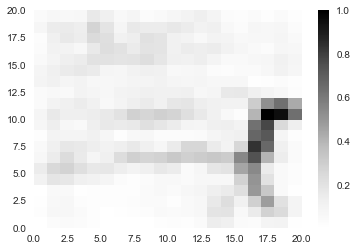

In [358]:
plt.pcolor(som.distance_map().T)
plt.colorbar()

[0, 20, 0, 20]

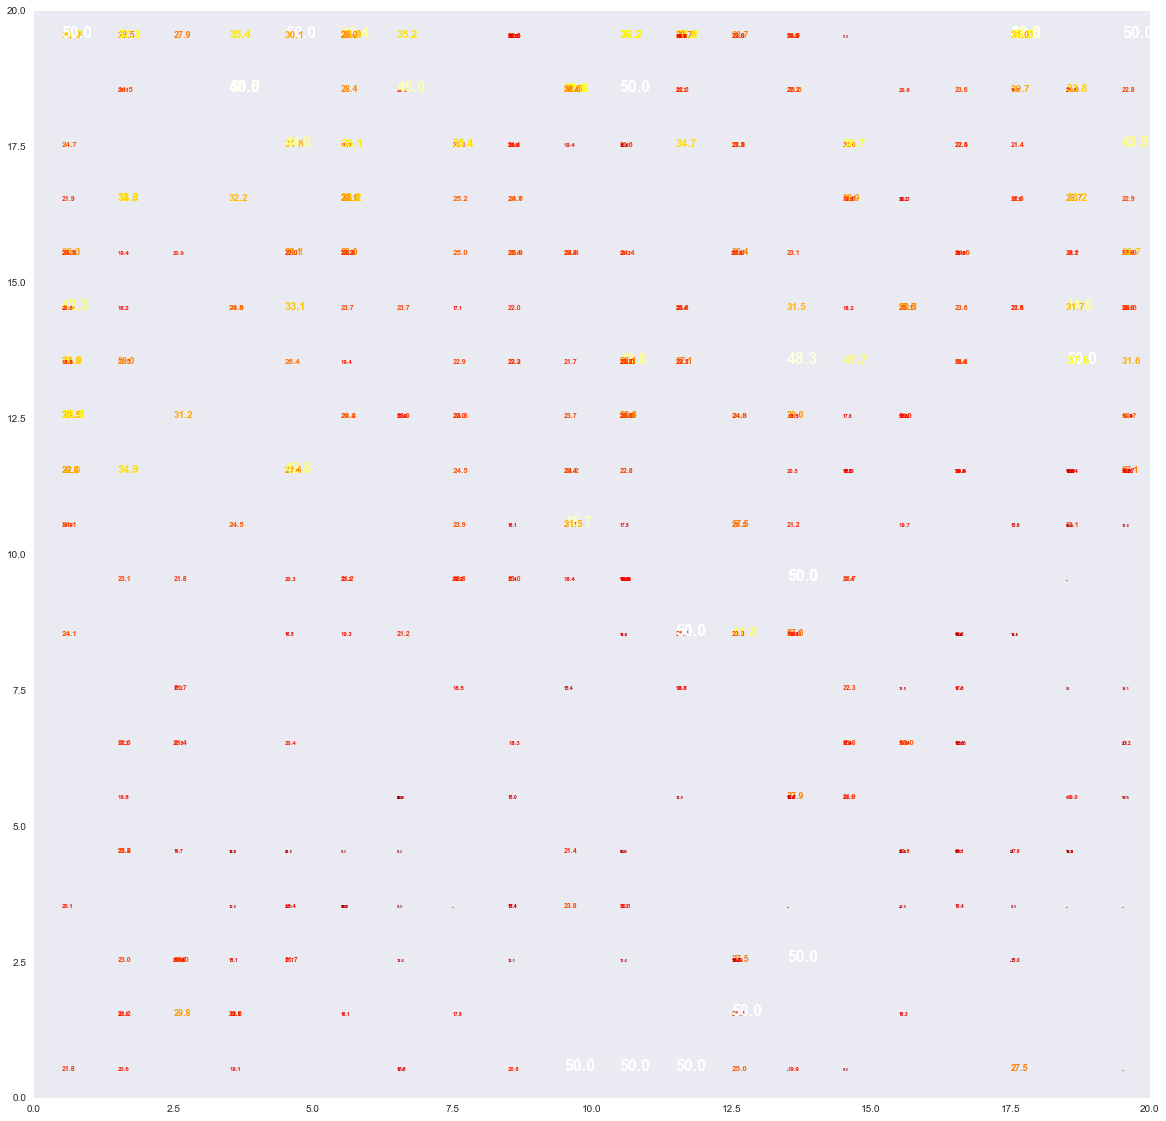

In [359]:
plt.figure(1,figsize=(20,20), facecolor='white')
im = 0
# scatterplot
for x,t in zip(boston_data.data,boston_data.target): 
    w = som.winner(x)

    plt.text(w[0]+.5, w[1]+.5, str(t), color=plt.cm.hot(t/50. ), fontdict={'weight': 'bold', 'size': int(t/3)})
    
    im = im + 1
plt.axis([0,som.weights.shape[0],0,som.weights.shape[1]])